In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [17]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [18]:
X_train[0].shape

(32, 32, 3)

In [19]:
X_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [20]:
len(y_train)

50000

In [21]:
import numpy as np
num_class = len(set(y_train.flatten()))
print(num_class)

10


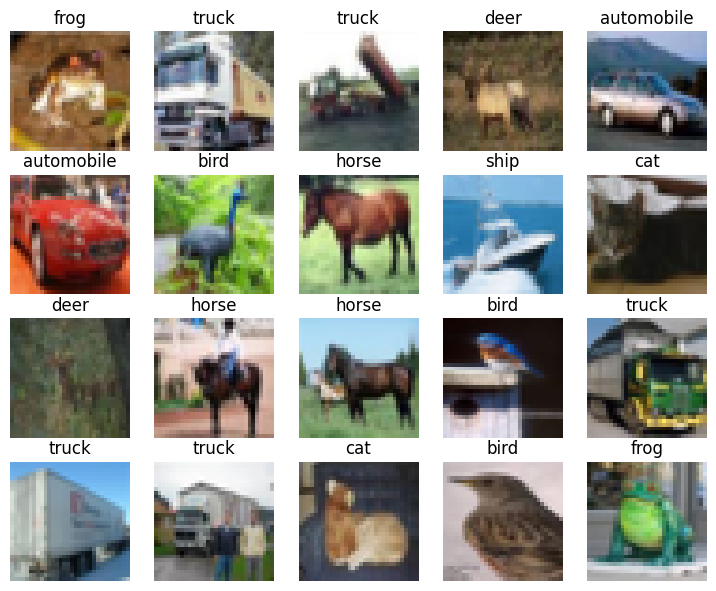

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(20):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])
plt.show()

In [23]:
len(X_train)

50000

In [24]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [25]:
X_train[0][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.

In [26]:
ann = Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    Dense(3072,activation='relu'),
    Dense(2072,activation='relu'),
    Dense(1072,activation='relu'),
    Dense(num_class, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
ann.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
history = ann.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2657 - loss: 2.1387 - val_accuracy: 0.3931 - val_loss: 1.6983
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3807 - loss: 1.7141 - val_accuracy: 0.3961 - val_loss: 1.6940
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4154 - loss: 1.6225 - val_accuracy: 0.4228 - val_loss: 1.6046
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4405 - loss: 1.5641 - val_accuracy: 0.4402 - val_loss: 1.5741
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4533 - loss: 1.5183 - val_accuracy: 0.4611 - val_loss: 1.5143
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4609 - loss: 1.4884 - val_accuracy: 0.4585 - val_loss: 1.5480
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4769 - loss: 1.4548 - val_accuracy: 0.4752 - val_loss: 1.4931
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4889 - loss: 1.4253 - val_ac

In [29]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4762 - loss: 1.4959


[1.5146098136901855, 0.4690999984741211]

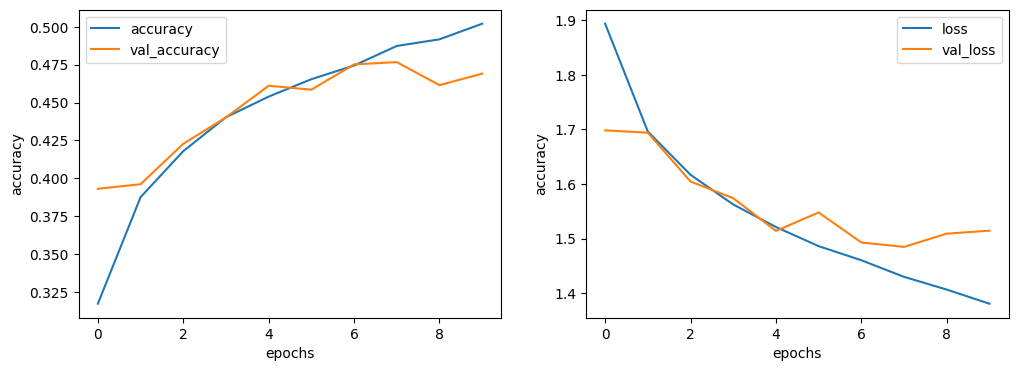

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [35]:
import numpy as np
predictions = ann.predict(X_test)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(30):
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i][0]  # Access the integer label
    print(f"image{i}:predicted:{class_names[predicted_label]}, True:{class_names[true_label]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
image0:predicted:cat, True:cat
image1:predicted:truck, True:ship
image2:predicted:ship, True:ship
image3:predicted:airplane, True:airplane
image4:predicted:frog, True:frog
image5:predicted:frog, True:frog
image6:predicted:dog, True:automobile
image7:predicted:frog, True:frog
image8:predicted:horse, True:cat
image9:predicted:automobile, True:automobile
image10:predicted:ship, True:airplane
image11:predicted:truck, True:truck
image12:predicted:automobile, True:dog
image13:predicted:horse, True:horse
image14:predicted:truck, True:truck
image15:predicted:ship, True:ship
image16:predicted:dog, True:dog
image17:predicted:truck, True:horse
image18:predicted:ship, True:ship
image19:predicted:frog, True:frog
image20:predicted:automobile, True:horse
image21:predicted:airplane, True:airplane
image22:predicted:bird, True:deer
image23:predicted:truck, True:truck
image24:predicted:horse, True:dog
image25:predicted:bird, True:bird
image26:predicted:frog, True: